# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este notebook conterá o projeto final do módulo 16 do curso de ciência de dados da EBAC, nele, iremos analisar a base de dados de renda que já foi utilizada em módulos passados, aqui iremos fazer uma análise nos moldes do método CRISP - DM, onde todas as etapas necessárias, desde entendimento dos dados até implementação será feita e discutida no mesmo notebook.

## Etapa 2 Crisp-DM: Entendimento dos dados

A base de dados que será analisada contem diversas informações sobre os clientes, como sexo, quantidade de filhos, estado civil, etc. 


### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                | Data de referência de coleta das variáveis          | Object       |
| id_cliente              | Código de identificação do cliente                  | Int 64       |
| sexo                    | Sexo do cliente                                     | Object       |
| posse_de_veiculo        | Indica se o cliente possui veículo                  | Bool         |
| posse_de_imovel         | Indica se o cliente possui imóvel                   | Bool         |
| qtd_filhos              | Quantidade de filhos do cliente                     | Int 64       |
| tipo_renda              | Tipo de renda do cliente                            | Object       |
| educacao                | Grau de instrução do cliente                        | Object       |
| estado_civil            | Estado civil do cliente                             | Object       |
| tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)| Object       |
| idade                   | Idade do cliente                                    | Int 64       |
| tempo_emprego           | Tempo no emprego atual                              | Float 64     |
| qt_pessoas_residencia   | Quantidade de pessoas que moram na residência       | Float 64     |
| renda                   | Renda em reais                                      | Float 64     |





#### Carregando os pacotes

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from ydata_profiling import ProfileReport
import patsy
from sklearn.linear_model import Ridge

#### Carregando os dados

In [2]:
renda = pd.read_csv('previsao_de_renda.csv')

In [3]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [85]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Nesta etapa, como já temos a base de dados desejada, iremos deixá-la apta para os tratamentos futuros, para isso, iremos apagar as coluna ´data_ref' e 'id_cliente' já que elas serão inuteis para nossas análises, além disso, iremos, criar variaveis dummy de formaa a deixar todas as colunas com valores numéricos. 


In [4]:
renda_encoded = (pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
                 .drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
                 .reset_index(drop=True))
renda_encoded[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
         'sexo_M',
       'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental']] = renda_encoded[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
         'sexo_M',
       'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental']].astype(int)

renda_encoded.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,1,0,26,6.602740,1.0,8060.34,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,1,0,28,7.183562,2.0,1852.15,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,35,0.838356,2.0,2253.89,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,30,4.846575,3.0,6600.77,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,33,4.293151,1.0,6475.97,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
renda_encoded.dtypes

posse_de_veiculo                   int32
posse_de_imovel                    int32
qtd_filhos                         int32
idade                              int32
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                             int32
tipo_renda_Bolsista                int32
tipo_renda_Empresário              int32
tipo_renda_Pensionista             int32
tipo_renda_Servidor público        int32
educacao_Pós graduação             int32
educacao_Secundário                int32
educacao_Superior completo         int32
educacao_Superior incompleto       int32
estado_civil_Separado              int32
estado_civil_Solteiro              int32
estado_civil_União                 int32
estado_civil_Viúvo                 int32
tipo_residencia_Casa               int32
tipo_residencia_Com os pais        int32
tipo_residencia_Comunitário        int32
tipo_residencia_Estúdio            int32
tipo_residencia_

Agora, como a base de dados está no formato desejado, podemos seguir para a parte de modelagem. 

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Agora com a base de dados devidamente tratadas, iremos primariamente rodar uma matriz de regressão para determinar quais as variavéis mais importantes e quais podem ser tiradas da análise, após isso, iremos determinar qual a relação entre as variavéis independentes e a variável resposta (exponincial, logaritimica, etc) de modo a aumentar o r-quadrado, por último, iremos treinar uma árvore de decisão para prever os valores e compará-los com os valores reais.

### Rodando o modelo


In [14]:
X = renda_encoded.drop(columns=['renda']).fillna(method='bfill').copy()
y = renda_encoded['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\samsun\AppData\Local\Temp\ipykernel_8352\458495068.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = renda_encoded.drop(columns=['renda']).fillna(method='bfill').copy()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                              421.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:01:56   Log-Likelihood:                     -1.1600e+05
No. Observations:               11250   AIC:                                  2.320e+05
Df Residuals:                   11226   BIC:                                  2.322e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
posse_de_veiculo                 -0.7149    153.989     -0.005      0.996    -302.561     301.131
posse_de_imovel                 235.6384    151.475      1.556      0.120     -61.279     532.556
qtd_filhos                     1077.4886    470.810      2.289      0.022     154.618    2000.359
idade                            55.7510      8.784      6.347      0.000      38.532      72.970
tempo_emprego                   440.1379     10.729     41.024      0.000     419.108     461.168
qt_pessoas_residencia          -982.1353    449.247     -2.186      0.029   -1862.739    -101.532
sexo_M                         5706.3624    162.504     35.115      0.000    5387.825    6024.900
tipo_renda_Bolsista           -1132.1008   2978.343     -0.380      0.704   -6970.175    4705.973
tipo_renda_Empresário           740.2918    173.323      4.271      0.000     400.548    1080.036
tipo_renda_Pensionista        -1958.3543    245.289     -7.984      0.000   -2439.163   -1477.546
tipo_renda_Servidor público     349.6971    262.851      1.330      0.183    -165.538     864.932
educacao_Pós graduação          706.7389   1876.098      0.377      0.706   -2970.741    4384.219
educacao_Secundário              30.6950    624.845      0.049      0.961   -1194.110    1255.500
educacao_Superior completo      711.1239    630.004      1.129      0.259    -523.794    1946.042
educacao_Superior incompleto   -464.1282    714.046     -0.650      0.516   -1863.783     935.527
estado_civil_Separado         -1181.3314    534.301     -2.211      0.027   -2228.655    -134.007
estado_civil_Solteiro         -1461.0338    478.430     -3.054      0.002   -2398.840    -523.227
estado_civil_União             -369.9603    271.620     -1.362      0.173    -902.383     162.462
estado_civil_Viúvo             -959.6362    566.296     -1.695      0.090   -2069.676     150.404
tipo_residencia_Casa           -353.1040    615.870     -0.573      0.566   -1560.316     854.109
tipo_residencia_Com os pais    -473.7517    690.468     -0.686      0.493   -1827.191     879.687
tipo_residencia_Comunitário    -927.9174   1182.920     -0.784      0.433   -3246.648    1390.813
tipo_residencia_Estúdio         933.7463   1093.102      0.854      0.393   -1208.926    3076.418
tipo_residencia_Governamental   383.1724    729.183      0.525      0.599   -1046.154    1812.499
==============================================================================
Omnibus:                    16756.186   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12906355.092
Skew:                           8.904   Prob(JB):                         0.00
Kurtosis:             

Dada a análise acima, vemos que apenas as colunas de idade, tempo de emprego, sexo, tipo de renda para empresário e pensionista possuem o p-value menor que 5%, logo, todas as outras colunas serão removidas e será feito uma nova análise.

In [61]:
X_2 = renda_encoded.drop(columns=['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda_Bolsista', 'tipo_renda_Servidor público',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental', 'renda', 'estado_civil_Separado', 'estado_civil_Solteiro',
       'estado_civil_União', 'qt_pessoas_residencia']).fillna(method='bfill').copy()
y_2 = renda_encoded[('renda')]

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

model_2 = sm.OLS(y_2_train, X_2_train).fit()

model_2.summary()

C:\Users\samsun\AppData\Local\Temp\ipykernel_8352\1109484623.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  'estado_civil_União', 'qt_pessoas_residencia']).fillna(method='bfill').copy()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.467
Method:                 Least Squares   F-statistic:                              1840.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:44:14   Log-Likelihood:                     -1.0837e+05
No. Observations:               10500   AIC:                                  2.167e+05
Df Residuals:                   10495   BIC:                                  2.168e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
idade                     13.7771      3.412      4.038      0.000       7.088      20.466
tempo_emprego            443.0473     11.119     39.847      0.000     421.252     464.842
sexo_M                  5484.4442    151.110     36.294      0.000    5188.239    5780.649
tipo_renda_Empresário    594.4757    172.369      3.449      0.001     256.600     932.352
tipo_renda_Pensionista -1460.8200    227.363     -6.425      0.000   -1906.494   -1015.146
==============================================================================
Omnibus:                    15923.677   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13074579.383
Skew:                           9.217   Prob(JB):                         0.00
Kurtosis:                     174.886   Cond. No.                         155.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mesmo removendo todas as colunas com p-value maior que 5%, ainda assim, o r-quadrado teve um aumento pouco significante, iremos agora testar os métodos ridge e lasso nas mesmas base de dados, iremos tambem testar se a renda possui alguma relação não linear (logaritmica ou exponencial).

In [72]:
#Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_2_train, y_2_train)
y_pred = ridge_reg.predict(X_2_test)
r2 = r2_score(y_2_test, y_pred)
r2

0.30233267366203065

In [73]:
#Lasso
modelo = 'renda ~ idade + tempo_emprego + sexo_M + tipo_renda_Empresário + tipo_renda_Pensionista'
md = smf.ols(modelo, data= renda_encoded)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         )
reg.rsquared

0.2535421196847064

In [74]:
y_3 = np.log(renda_encoded['renda'])
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_2, y_3, test_size=0.3, random_state=42)

model_3 = sm.OLS(y_3_train, X_3_train).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          5.274e+04
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:49:03   Log-Likelihood:                         -19921.
No. Observations:               10500   AIC:                                  3.985e+04
Df Residuals:                   10495   BIC:                                  3.989e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
idade                      0.1643      0.001    219.194      0.000       0.163       0.166
tempo_emprego              0.0482      0.002     19.728      0.000       0.043       0.053
sexo_M                     1.7271      0.033     52.028      0.000       1.662       1.792
tipo_renda_Empresário      0.8181      0.038     21.606      0.000       0.744       0.892
tipo_renda_Pensionista    -2.4679      0.050    -49.411      0.000      -2.566      -2.370
==============================================================================
Omnibus:                       40.008   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.760
Skew:                          -0.089   Prob(JB):                     2.83e-08
Kurtosis:                       2.781   Cond. No.                         155.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Com a regressão acima, vemos que a renda possui uma relação exponencial com as variaveis selecionadas, já que ela foi linearizada pelo log, além disso, como o modelo conta com o menor número de variáveis possível, a chance de acontecer overfitting é baixa.

In [59]:
arvore = DecisionTreeRegressor(max_depth=7 ,random_state= 42)
arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [75]:
previsao = arvore.predict(X_test)
r_square = r2_score(y_test, previsao)
r_square

0.3837733810057854

[Text(0.5935496794871795, 0.9375, 'sexo_M <= 0.5\nsquared_error = 68652000.64\nsamples = 11250\nvalue = 5648.889'),
 Text(0.33934294871794873, 0.8125, 'tempo_emprego <= 22.438\nsquared_error = 19292096.628\nsamples = 7615\nvalue = 4033.092'),
 Text(0.20272435897435898, 0.6875, 'tempo_emprego <= 10.199\nsquared_error = 10321884.54\nsamples = 7174\nvalue = 3649.12'),
 Text(0.10256410256410256, 0.5625, 'tempo_emprego <= 3.459\nsquared_error = 6622629.606\nsamples = 5528\nvalue = 3207.101'),
 Text(0.05128205128205128, 0.4375, 'qtd_filhos <= 2.5\nsquared_error = 5418809.249\nsamples = 2102\nvalue = 2852.724'),
 Text(0.02564102564102564, 0.3125, 'tempo_emprego <= 0.723\nsquared_error = 5322328.019\nsamples = 2074\nvalue = 2828.085'),
 Text(0.01282051282051282, 0.1875, 'idade <= 58.5\nsquared_error = 3056862.745\nsamples = 342\nvalue = 2409.378'),
 Text(0.00641025641025641, 0.0625, 'squared_error = 2065250.835\nsamples = 280\nvalue = 2242.311'),
 Text(0.019230769230769232, 0.0625, 'squared_er

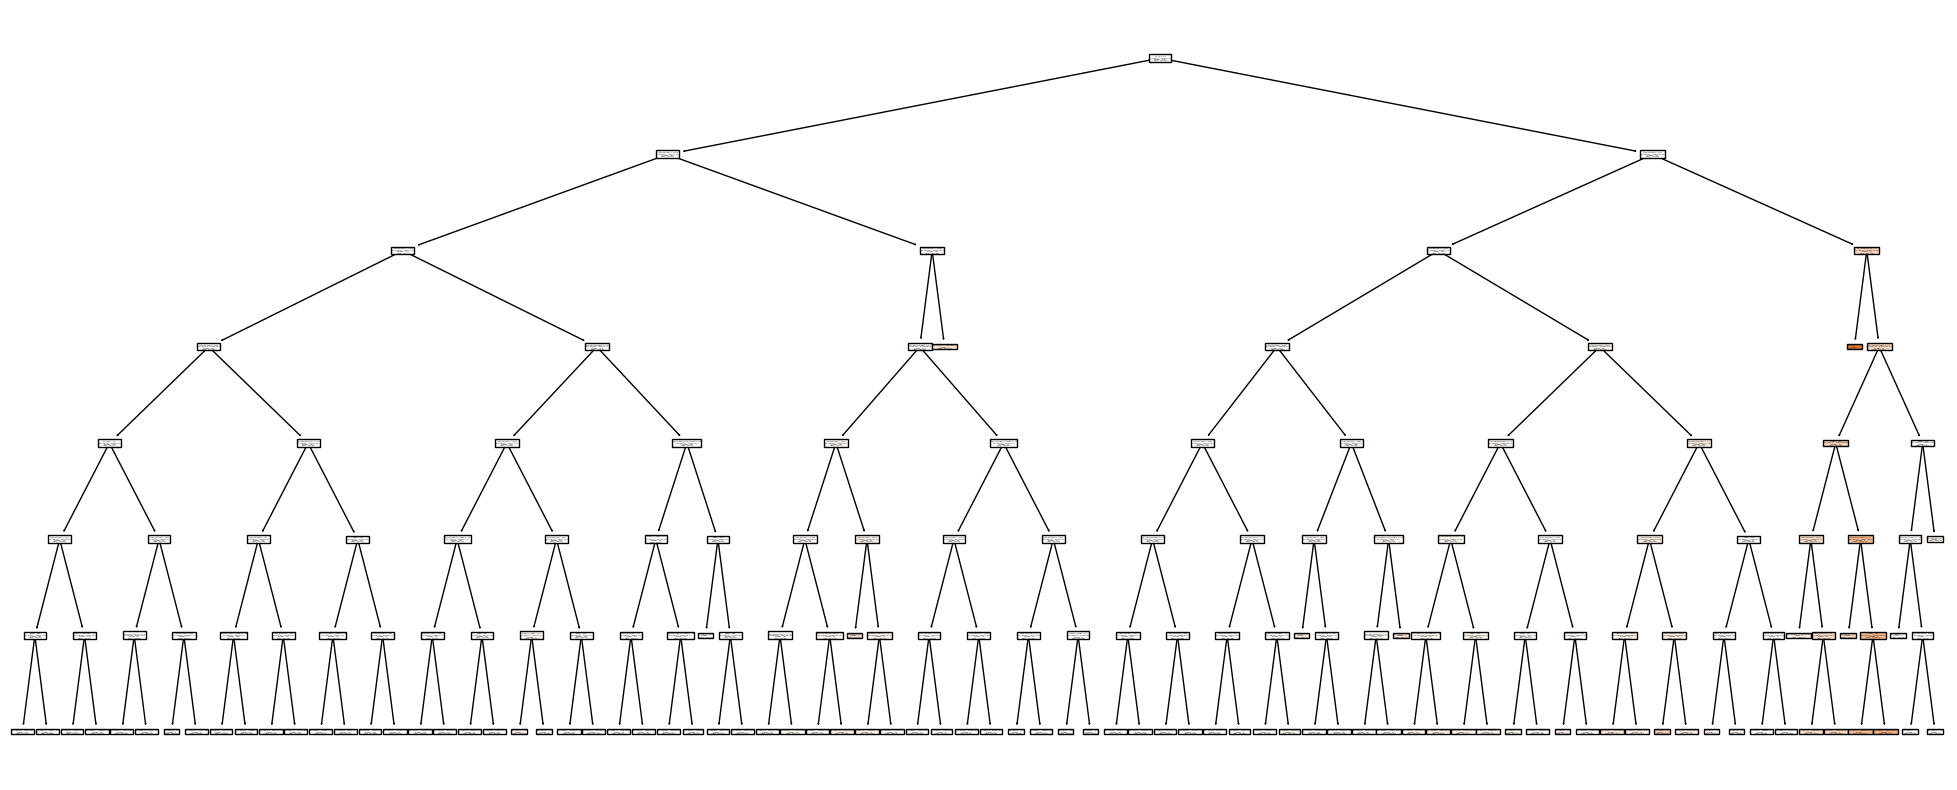

In [76]:
plt.figure(figsize=(25, 10))
plot_tree(arvore,
          filled=True,
          feature_names=X.columns)

In [77]:
arvore_2 = DecisionTreeRegressor(max_depth=8 ,random_state= 42)
arvore_2.fit(X_2_train, y_2_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [78]:
previsao_2 = arvore_2.predict(X_2_test)
r2_score(y_2_test,previsao_2)

0.35075849044650964

[Text(0.5243733723958334, 0.9444444444444444, 'sexo_M <= 0.5\nsquared_error = 0.777\nsamples = 10500\nvalue = 8.199'),
 Text(0.27734375, 0.8333333333333334, 'tempo_emprego <= 12.553\nsquared_error = 0.617\nsamples = 7110\nvalue = 7.972'),
 Text(0.14534505208333334, 0.7222222222222222, 'tempo_emprego <= 7.532\nsquared_error = 0.521\nsamples = 5626\nvalue = 7.843'),
 Text(0.08072916666666667, 0.6111111111111112, 'tempo_emprego <= 3.47\nsquared_error = 0.505\nsamples = 4081\nvalue = 7.777'),
 Text(0.041666666666666664, 0.5, 'tempo_emprego <= 0.723\nsquared_error = 0.499\nsamples = 1959\nvalue = 7.707'),
 Text(0.020833333333333332, 0.3888888888888889, 'idade <= 45.5\nsquared_error = 0.42\nsamples = 318\nvalue = 7.561'),
 Text(0.010416666666666666, 0.2777777777777778, 'tipo_renda_Empresário <= 0.5\nsquared_error = 0.492\nsamples = 176\nvalue = 7.461'),
 Text(0.005208333333333333, 0.16666666666666666, 'tempo_emprego <= 0.362\nsquared_error = 0.498\nsamples = 112\nvalue = 7.378'),
 Text(0.002

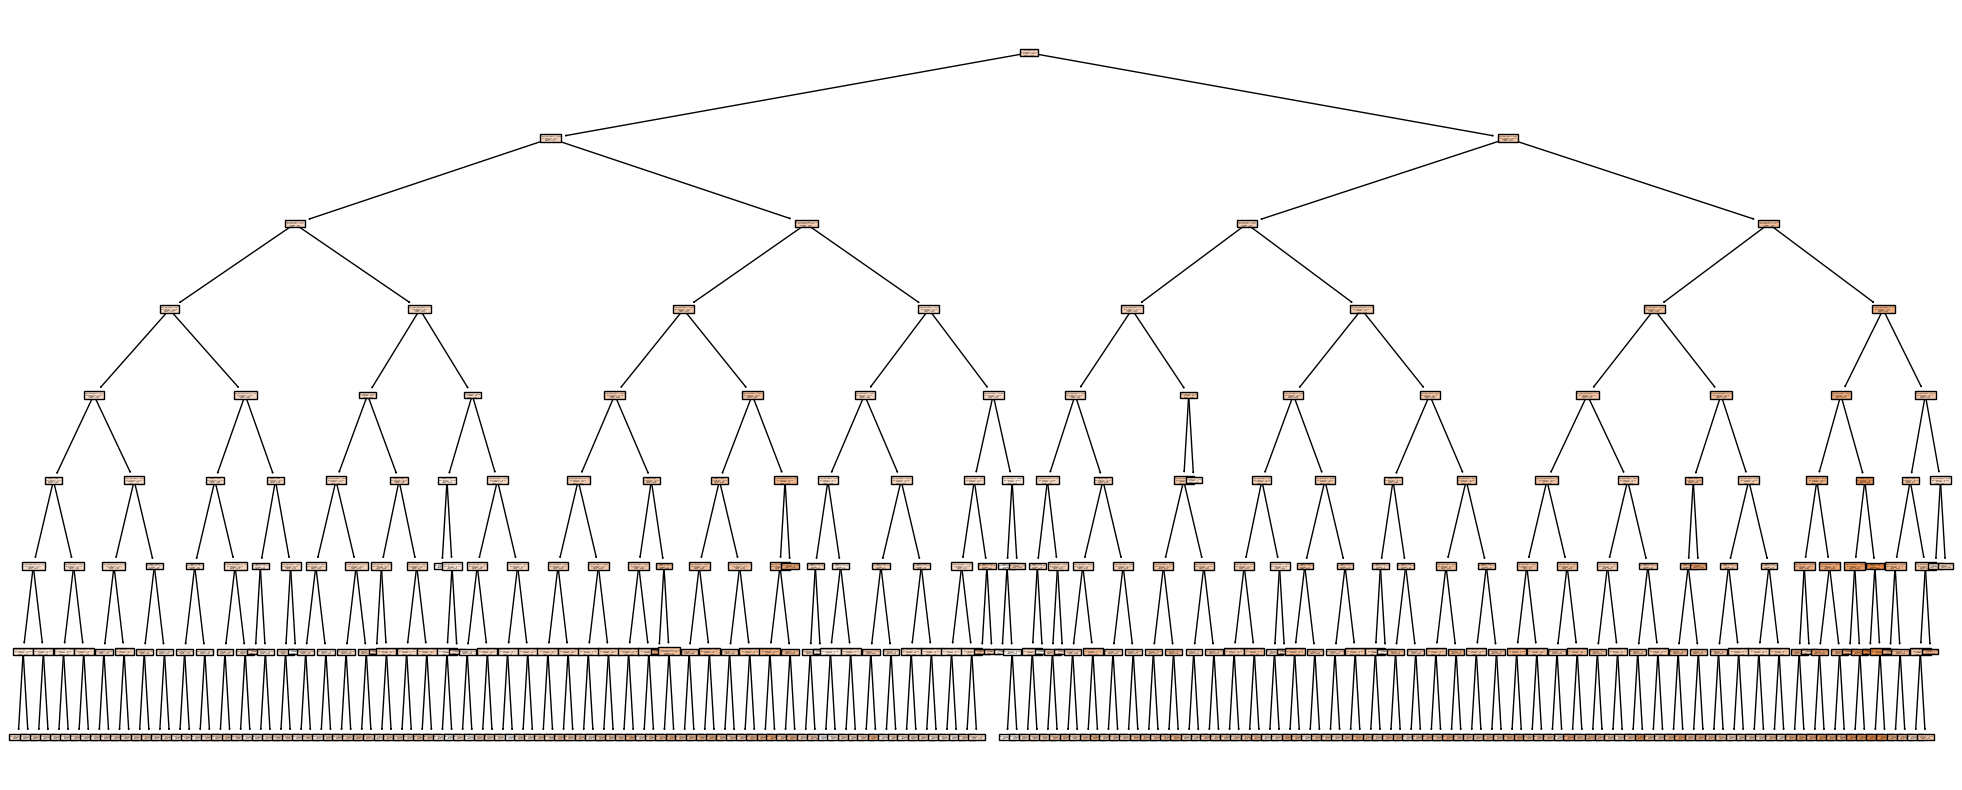

In [79]:
plt.figure(figsize=(25, 10))
plot_tree(arvore_2,
          filled=True,
          feature_names=X_2.columns)

In [82]:
arvore_3 = DecisionTreeRegressor(max_depth= 8, random_state= 42).fit(X_3_train, y_3_train)
previsao_3 = arvore_3.predict(X_3_test)
r2_score(previsao_3, y_3_test)

-0.6472484890681165

[Text(0.5243733723958334, 0.9444444444444444, 'sexo_M <= 0.5\nsquared_error = 0.777\nsamples = 10500\nvalue = 8.199'),
 Text(0.27734375, 0.8333333333333334, 'tempo_emprego <= 12.553\nsquared_error = 0.617\nsamples = 7110\nvalue = 7.972'),
 Text(0.14534505208333334, 0.7222222222222222, 'tempo_emprego <= 7.532\nsquared_error = 0.521\nsamples = 5626\nvalue = 7.843'),
 Text(0.08072916666666667, 0.6111111111111112, 'tempo_emprego <= 3.47\nsquared_error = 0.505\nsamples = 4081\nvalue = 7.777'),
 Text(0.041666666666666664, 0.5, 'tempo_emprego <= 0.723\nsquared_error = 0.499\nsamples = 1959\nvalue = 7.707'),
 Text(0.020833333333333332, 0.3888888888888889, 'idade <= 45.5\nsquared_error = 0.42\nsamples = 318\nvalue = 7.561'),
 Text(0.010416666666666666, 0.2777777777777778, 'tipo_renda_Empresário <= 0.5\nsquared_error = 0.492\nsamples = 176\nvalue = 7.461'),
 Text(0.005208333333333333, 0.16666666666666666, 'tempo_emprego <= 0.362\nsquared_error = 0.498\nsamples = 112\nvalue = 7.378'),
 Text(0.002

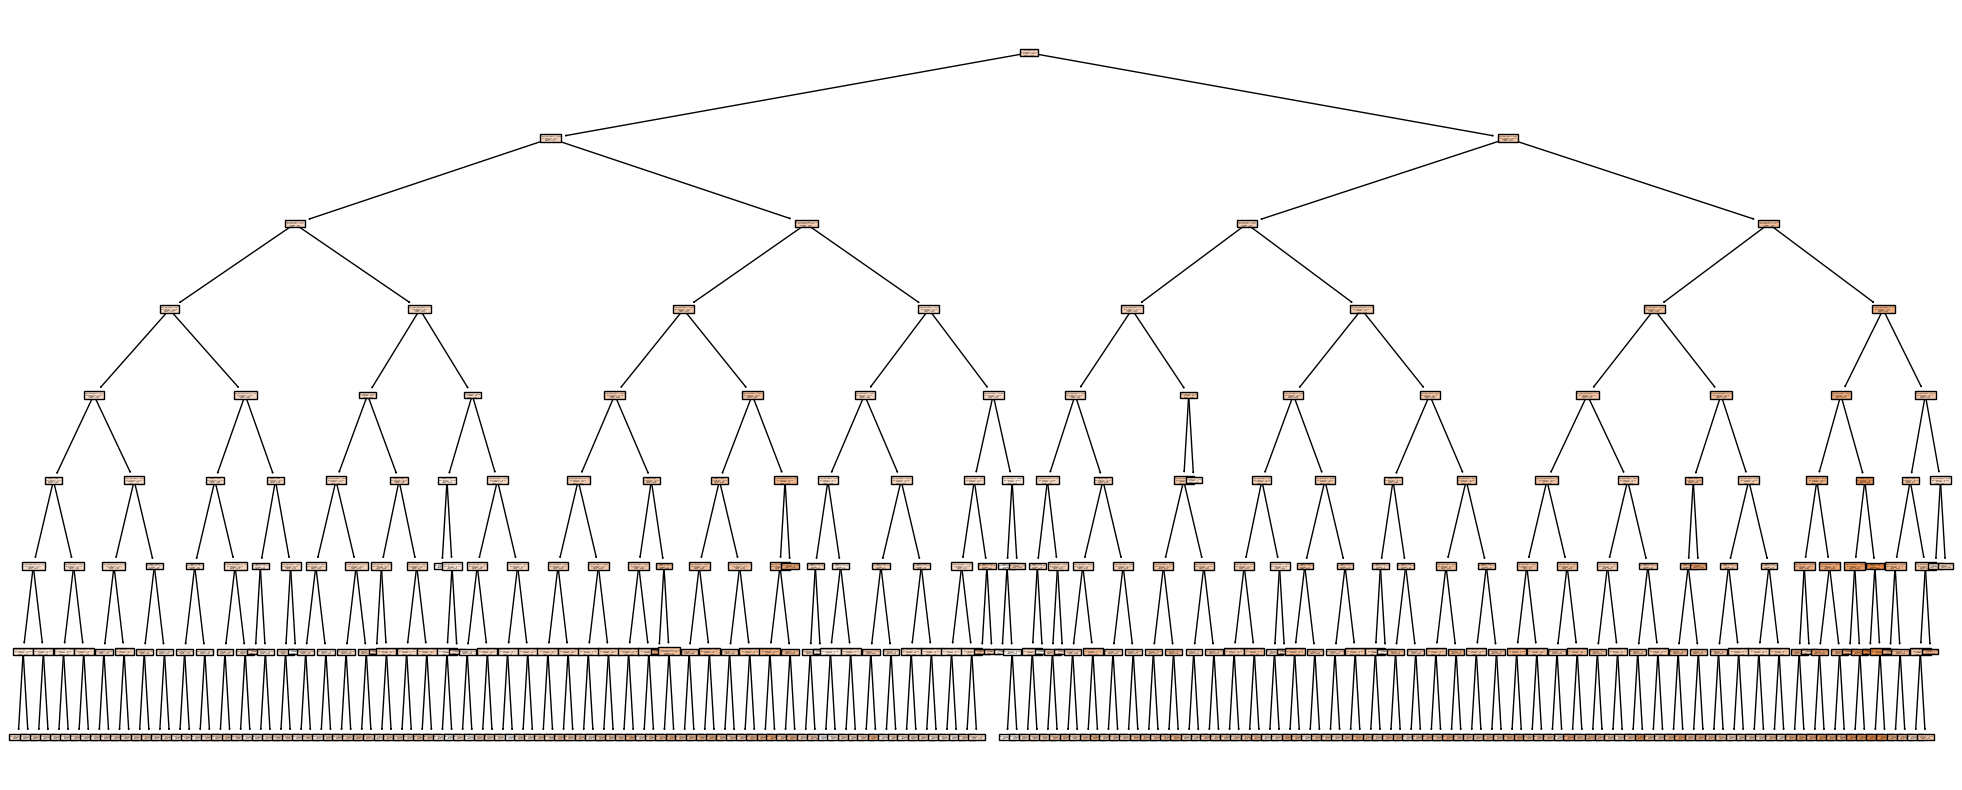

In [84]:
plt.figure(figsize=(25, 10))
plot_tree(arvore_3,
          filled=True,
          feature_names=X_2.columns)

## Etapa 5 Crisp-DM: Avaliação dos resultados


Como visto, ao se retirar as variáveis com valores de p maiores que 5% o r-quadrado aumenta, porém, um aumento pouco significante, isso ocorre também nos métodos Ridge e Lasso, o que realmente fez a diferença foi aplicar o logaritmo na coluna de renda, o que elevou o r-quadrado para valores de mais de 0,95.
Obs: Nos valores de x, foi utilizado o método .fillna para preencher os valores nan, isso pode ter gerado uma tendencia que iria afetar estatisticamente a análise.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

A implantação deste modelo será feita em um arquivo .py, para ser rodado no streamlit.